# Solutions for HW4
### Nicolas Gianoli, Nouri Sakr

In [15]:
import numpy as np
from datascience import *
import matplotlib.pyplot as plots
plots.style.use('fivethirtyeight')
%matplotlib inline

## Question 1

Coins are fair, so :

$$ P(H) =P(T) = \frac{1}{2} $$

Thus:

$$P(N_{Head}=i) = \dbinom{n}{i} (\frac{1}{2})^i (1 - \frac{1}{2})^{n-i}$$
$$P(N_{Head}=i) = \frac{1}{2^n} \dbinom{n}{i} $$
and :

$$P(N_{Head}\geq i) = \sum_{k=i}^n P(N_{Head}=k) $$
$$P(N_{Head}\geq i) = \sum_{k=i}^n\frac{1}{2^n} \dbinom{n}{k} $$
$$P(N_{Head}\geq i) = \frac{1}{2^n} \sum_{k=i}^n \dbinom{n}{k} $$



## Question 2

Let D denotes the random variable of a die value.

Let S denotes the random variable of sum of three dice values.

D can take 6 values $ \{1,2,3,4,5,6\}$, 3 are odd, 3 are even. Thus:

$ P(\text{D odd})= P(\text{D even})= \frac{1}{2} $

and we can use the fact that :

$$ P(\text{S odd}) =  P(\text{3 dices odd}) + P(\text{2 dices even and one dice odd}) $$
$$ P(\text{S odd}) =  (\frac{1}{2})^3 + (\frac{1}{2})^3 \dbinom{3}{2} $$
$$ P(\text{S odd}) =  \frac{1}{2}$$


## Question 3

How many potential 4 card hands ? $\dbinom{52}{4}  = \frac{49 \cdot 50 \cdot 51 \cdot 52}{24} $

How many 4 card hands with 2 kings ? $\dbinom{4}{2} \dbinom{48}{2} = 3 \cdot 47 \cdot 48$

How many 4 card hands with 3 kings ? $\dbinom{4}{3} \dbinom{48}{1} = 4 \cdot 48 $

How many 4 card hands with 4 kings ? $\dbinom{4}{4} \dbinom{48}{0} = 1$  


$$ P = \dbinom{9}{1} \cdot \frac{(3 \cdot 47 \cdot 48) + (4 \cdot 48) + 1}{\frac{49 \cdot 50 \cdot 51 \cdot 52}{24} } $$ 
$$ P = 9 \cdot 24 \cdot \frac{(3 \cdot 47 \cdot 48) + (4 \cdot 48) + 1}{49 \cdot 50 \cdot 51 \cdot 52} $$ 

In [16]:
P = 9*24 * ( (3 * 47 * 48) + (4 * 48) + 1 )/(49 * 50 * 51 * 52)
P

0.23141194939514267

## Question 4

Let the random variables $C_1$ and $C_2$ denote the first and the second cards.

$$ P(a) = P(C_1=\text{King})\cdot P(C_2=\text{Ace}) + P(C_1=\text{King})\cdot P(C_2=\text{Ace})$$
$$ P(a) = \frac{4}{52} \cdot \frac{4}{51} + \frac{4}{52} \cdot \frac{4}{51} $$
$$ P(a) =  \frac{8}{13\cdot51} $$

Similarly :

$$ P(b) = P(C_1=\text{King})\cdot P(C_2=\text{Ace}) + P(C_1=\text{King})\cdot P(C_2=\text{Ace})$$
$$ P(b) = \frac{1}{13} \cdot \frac{1}{12} + \frac{1}{13} \cdot \frac{1}{12} $$
$$ P(b) =  \frac{1}{13\cdot6} $$

(b) is more likely, but those probabilities are almost the same.

## Question 5

In [17]:
# (a)
# The frequencies are calculated as the areas of the corresponding rectangles
frequencies = Table().with_columns([
    't', ['5-10','10_14','14_18','18_25','25_40'],
    'Frequency', [10,16,24,35,15]])

# (b)
frequencies = frequencies.with_column('average t', [7.5, 12, 16, 21.5, 32.5])
estimated_mean_t = (frequencies['Frequency'] * frequencies['average t']).sum()/frequencies['Frequency'].sum()
print('Estimated mean time taken to complete the homework : ', estimated_mean_t)

Estimated mean time taken to complete the homework :  18.91


**(c)**
There are $ 10+16+24 =50 $ students who finished in less than 18 minutes.

35 students finished between 18 and 25 minutes.

If we assumed that the distribution is uniform, it means that approximately $35 \times \frac{20-18}{25-18} = 10$ students finished between 18 and 20.

Finally the percentage is $\frac{60}{100} \times 100\% = 60\% $



## Question 6

In [18]:
ages = Table.read_table('Ages.csv').drop('Client ID')
count_ages = ages.group('Age').sort('Age')
print('max age : ', count_ages['Age'].max())

max age :  95


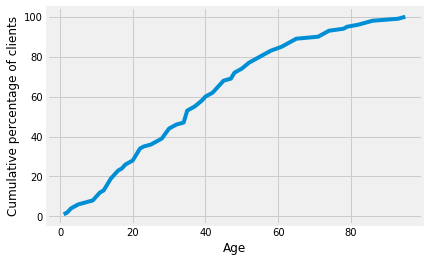

In [19]:
# We can start with a cumulative distribution plot
cum_sum = np.cumsum(count_ages['count'])
plots.plot(count_ages['Age'], cum_sum)
plots.xlabel('Age')
plots.ylabel('Cumulative percentage of clients')
plots.show()

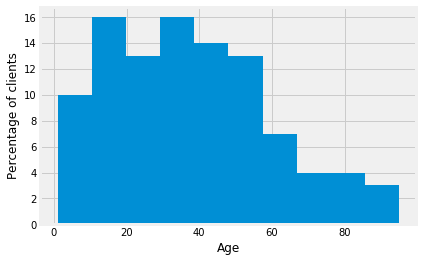

In [20]:
# we can plot several histograms
# An idea could be to define bins according to the insurance age groups.
plots.hist(ages['Age'])
plots.xlabel('Age')
plots.ylabel('Percentage of clients')
plots.show()

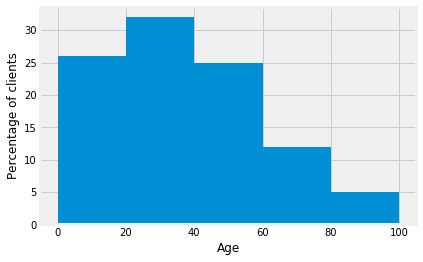

In [22]:
plots.hist(ages['Age'], bins=np.arange(6)*20)
plots.xlabel('Age')
plots.ylabel('Percentage of clients')
plots.show()

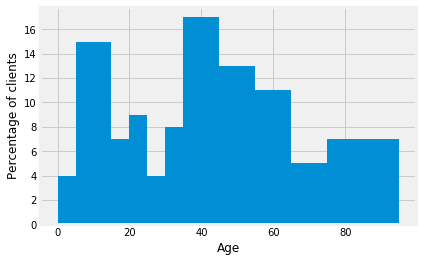

In [24]:
plt.hist(ages['Age'], bins=[0, 5, 15, 20, 25, 30, 35, 45, 55, 65, 75, 95])
plt.xlabel('Age')
plt.ylabel('Percentage of clients')
plt.show()

We are very limited by the data.

We do not have population age distribution to compare with.

We are only about to comment the distribution:
- most clients are between 0 and 60
- they have lots of clients between 12 and 16 and between 21 and 24.
- the number of insured children is almost the same as the number of middle-aged adults (who would have children in that age range) and so since children won't go insure themselves, it might be these are dependents of the older clients.



## Question 7

In [10]:
flowers = Table.read_table('Flowers.csv')
flowers.show(5)

Color
white
red
yellow
purple
white


### ** You can't draw histograms for a qualitative dataset! **

If the question was to plot a bar chart, you could have done this :

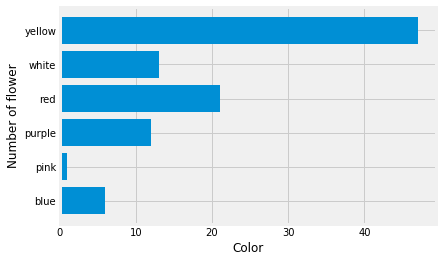

In [23]:
flower_colors = flowers.group('Color')
fig, ax = plt.subplots()
plots.barh(flower_colors['Color'], flower_colors['count'])
ax.set_xlabel('Color')
ax.set_ylabel('Number of flower')
plt.show()